In [1]:
import pandas as pd

In [2]:
sd=pd.read_csv(r"E:\Uddanous\07 Feb\hotel_booking_data.csv")

In [3]:
sd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,Unnamed: 36
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,0.0,0,0,Check-Out,01-07-2022,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,NaN
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,0.0,0,0,Check-Out,01-07-2022,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,NaN
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,75.0,0,0,Check-Out,02-07-2022,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,NaN
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,75.0,0,0,Check-Out,02-07-2022,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,NaN
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,98.0,0,1,Check-Out,03-07-2022,Linda Hines,LHines@verizon.com,713-226-5883,************5498,NaN


In [4]:
sd.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
sd.drop(columns=['name', 'email', 'phone-number', 'credit_card', 'Unnamed: 36'], errors='ignore', inplace=True)

In [7]:
sd['children'].fillna(0, inplace=True)

In [8]:
sd['country'].fillna("unknown", inplace=True)

In [9]:
sd['agent'].fillna("unknown", inplace=True)

In [10]:
sd['company'].fillna("unknown", inplace=True)

In [11]:
sd.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [12]:
sd['children'] = sd['children'].astype(int)

In [13]:
sd.to_csv("cleaned_hotel_booking_data.csv", index=False)

In [16]:
sd['agent'] = sd['agent'].replace("unknown", np.nan)

In [17]:
sd['agent'] = pd.to_numeric(sd['agent'], errors='coerce')

In [18]:
sd['agent'].fillna(0, inplace=True)

In [19]:
sd['agent'].dtype, sd['agent'].isnull().sum()

(dtype('float64'), 0)

In [21]:
sd.to_csv("cleaned_hotel_booking_data.csv", index=False)

# Create a New Column: "Desired or Non-Desired Booking"

In [23]:
sd['booking_status'] = sd['is_canceled'].apply(lambda x: 'Desired' if x == 0 else 'Non-Desired')

In [24]:
sd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_status
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,0.0,unknown,0,Transient,0.0,0,0,Check-Out,01-07-2022,Desired
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,0.0,unknown,0,Transient,0.0,0,0,Check-Out,01-07-2022,Desired
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,0.0,unknown,0,Transient,75.0,0,0,Check-Out,02-07-2022,Desired
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,304.0,unknown,0,Transient,75.0,0,0,Check-Out,02-07-2022,Desired
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,240.0,unknown,0,Transient,98.0,0,1,Check-Out,03-07-2022,Desired


# Check Who Cancels More: Family, Couple, Friends, or Single Guests

In [27]:
def categorize_guests(row):
    if row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    elif row['children'] > 0 or row['babies'] > 0:
        return 'Family'
    elif row['adults'] == 1:
        return 'Single'
    elif row['adults'] > 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Friends/Group'
    else:
        return 'Other'

sd['guest_category'] = sd.apply(categorize_guests, axis=1)



In [30]:
sd.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_status,guest_category
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,unknown,0,Transient,0.0,0,0,Check-Out,01-07-2022,Desired,Couple
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,unknown,0,Transient,0.0,0,0,Check-Out,01-07-2022,Desired,Couple
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,unknown,0,Transient,75.0,0,0,Check-Out,02-07-2022,Desired,Single
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,unknown,0,Transient,75.0,0,0,Check-Out,02-07-2022,Desired,Single
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,unknown,0,Transient,98.0,0,1,Check-Out,03-07-2022,Desired,Couple


In [38]:
sd.to_csv("cleaned_hotel_booking_data1.csv", index=False)

In [2]:
# Practice
df=pd.read_excel("data/customer_data.xlsx")
df.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [4]:
corre=df[['Income','Age','Frequency_of_Purchases','Average_Purchase_Amount']].corr()
corre

,Income,Age,Frequency_of_Purchases,Average_Purchase_Amount
Income,1.000000,0.078785,0.012531,-0.015175
Age,0.078785,1.000000,0.318509,0.077063
Frequency_of_Purchases,0.012531,0.318509,1.000000,0.065966
Average_Purchase_Amount,-0.015175,0.077063,0.065966,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: Rectangle.set() got an unexpected keyword argument 'kind'

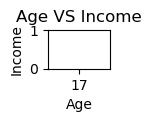

In [7]:
plt.figure(figsize=(.8,.5))
plt.title('Age VS Income')
plt.xlabel("Age")
plt.ylabel("Income")
sns.countplot(x="Age", data=df)
plt.show()